# **CNN Notebook**
Done by: **Lourde Hajjar**

Date: 14/11/2024

 I applied a Convolutional Neural Network (CNN) model to classify images in a medical dataset. The dataset included two variations: a balanced original dataset and a balanced focused dataset that ensures no noise was present. By training the CNN on these balanced datasets, I aimed to achieve robust and accurate classification performance, with the model benefiting from balanced class representation to avoid bias toward any particular class.

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Load the image original balanced dataset**

In [77]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Define paths and target image size
data_dir = '/content/gdrive/MyDrive/datasets/images/3_og_b'
img_size = (28, 28)  # Target size for your CNN model

# Lists to store images and labels
images = []
labels = []

# Load images from directory
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

class_names = ['normal', 'malignant', 'benign']

# Reshape images to add the channel dimension
images = images.reshape(-1, 28, 28, 1)

# Encode labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)


**Visualize dataset images turned into Gray-Scale**

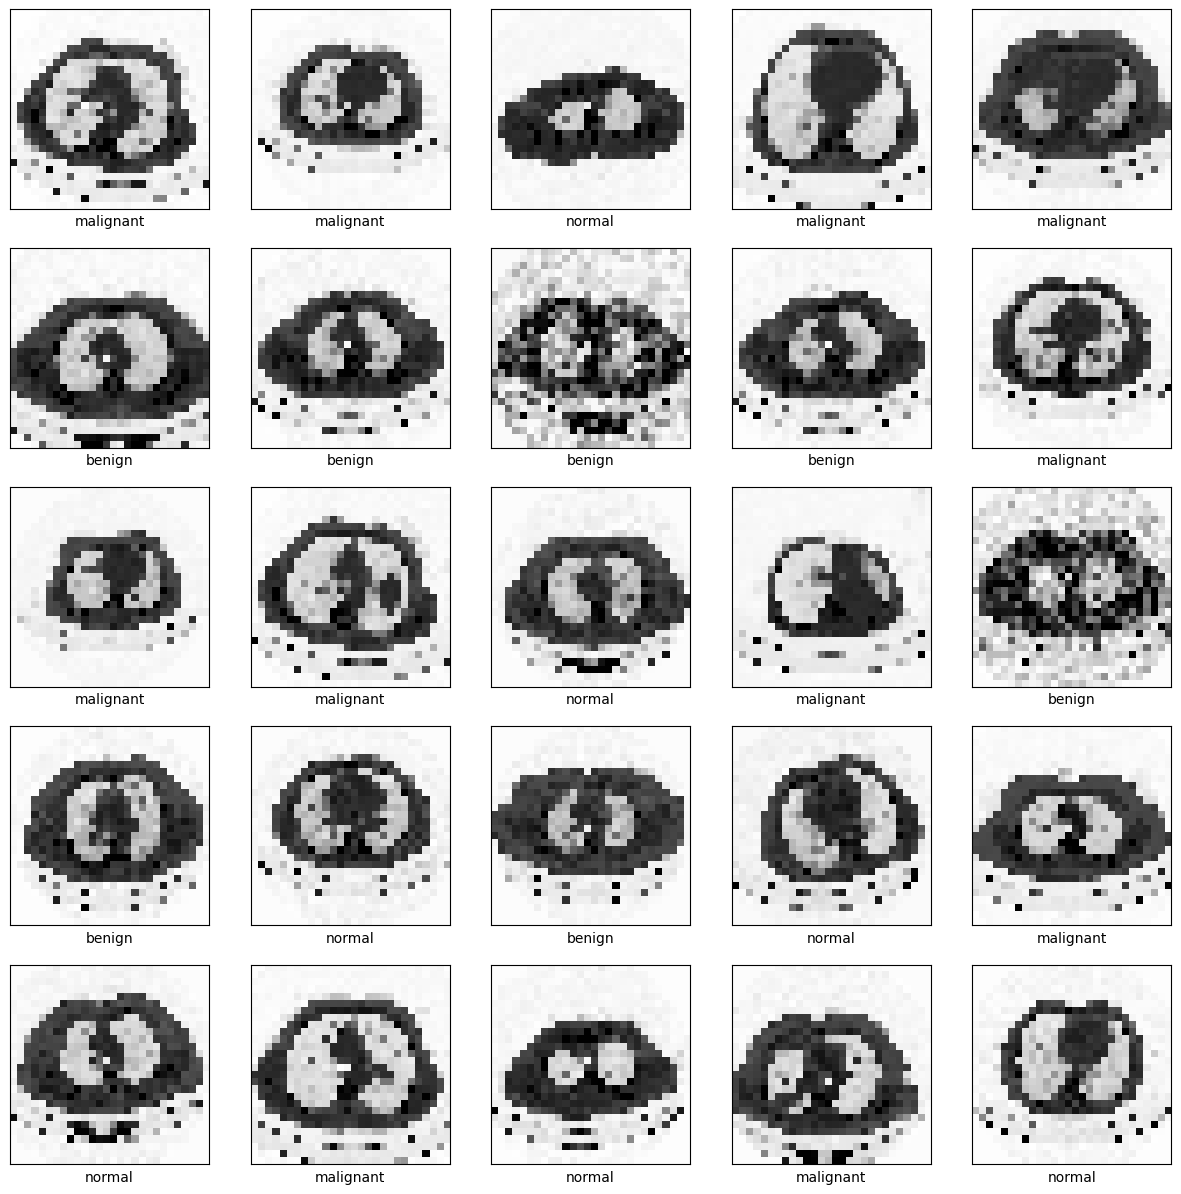

In [78]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [79]:
x_train=x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape #28*28=784

(1346, 28, 28, 1)

## **Building the CNN Model**

In [80]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

## **Train the CNN Model**

In [81]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3034 - loss: 1.4261
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5025 - loss: 0.9817
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6263 - loss: 0.8229
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7719 - loss: 0.6205
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8753 - loss: 0.3875
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9310 - loss: 0.2430
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9558 - loss: 0.1485
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9777 - loss: 0.1029
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9874 - loss: 0.0676
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9936 - loss: 0.0444
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9929 - loss: 0.0339
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy:

## **Evaluate The CNN Model**

In [82]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9910979270935059


## **Prediction**

In [83]:
classifications = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


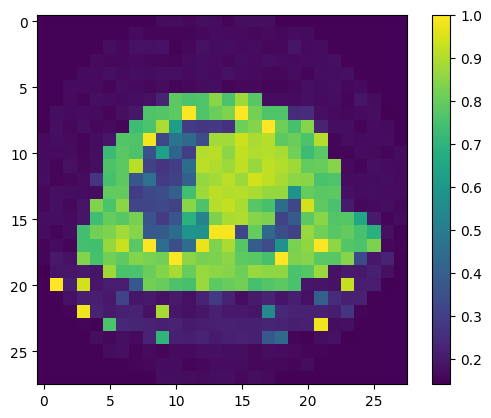

In [84]:
plt.imshow(x_test[3].reshape(28,28))
plt.colorbar()
plt.grid(False)

In [85]:
class_names[np.argmax(classifications[3])]

'malignant'

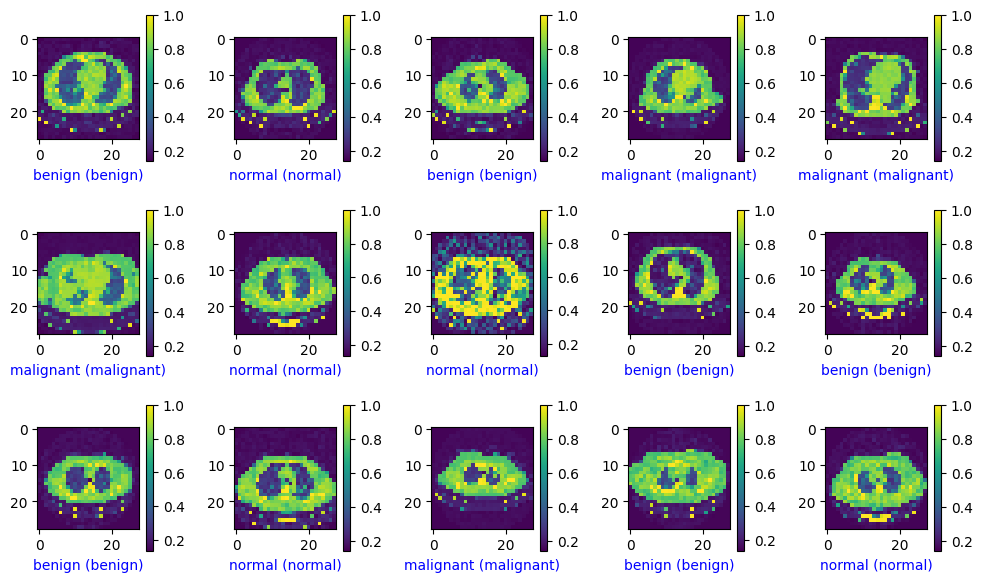

In [86]:
# Define number of rows and columns for the grid
num_rows = 3
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    img = x_test[i]  # No need to reshape if images are already in (28, 28, 3)
    plt.imshow(img)  # Displays the image in color
    plt.colorbar()
    plt.grid(False)

    # Show the predicted and true labels
    predicted_label = np.argmax(classifications[i])
    true_label = y_test[i] if len(y_test.shape) == 1 else np.argmax(y_test[i])

    # Set title with color coding for correct/incorrect predictions
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.tight_layout()
plt.show()

## **Visualize Layers**

In [ ]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor>]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


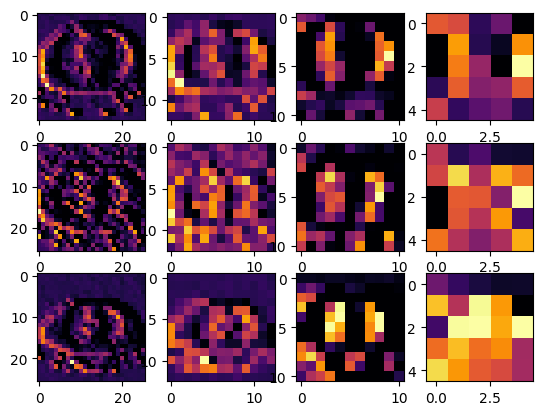

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
import tensorflow as tf

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

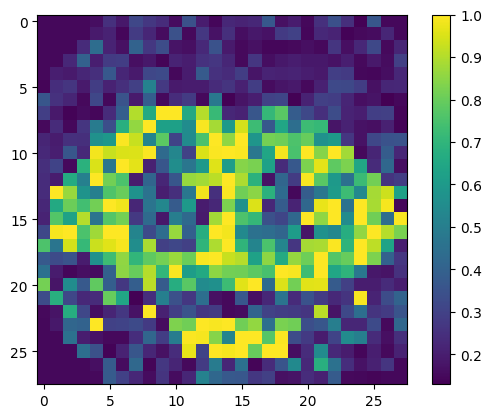

In [ ]:
plt.imshow(x_train[SECOND_IMAGE].reshape(28,28))
plt.colorbar()
plt.grid(False)

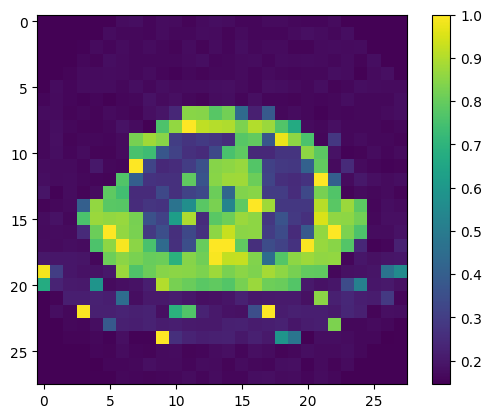

In [ ]:
plt.imshow(x_train[THIRD_IMAGE].reshape(28,28))
plt.colorbar()
plt.grid(False)

# **Load the image balanced Focused Dataset**

In [87]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Define paths and target image size
data_dir = '/content/gdrive/MyDrive/datasets/images/3_foc_b'
img_size = (28, 28)  # Target size for your CNN model

# Lists to store images and labels
images = []
labels = []

# Load images from directory
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

class_names = ['normal', 'malignant', 'benign']

# Reshape images to add the channel dimension
images = images.reshape(-1, 28, 28, 1)

# Encode labels to numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)


## Building the CNN Model

In [88]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the CNN Model

In [92]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 1.0000 - loss: 0.0064
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 0.0039
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy:

## Evaluate the CNN Model

In [93]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9643917083740234


## Prediction

In [94]:
classifications = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


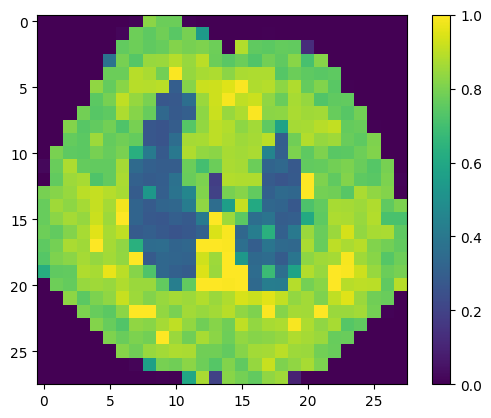

In [95]:
plt.imshow(x_test[3].reshape(28,28))
plt.colorbar()
plt.grid(False)

In [96]:
class_names[np.argmax(classifications[3])]

'benign'

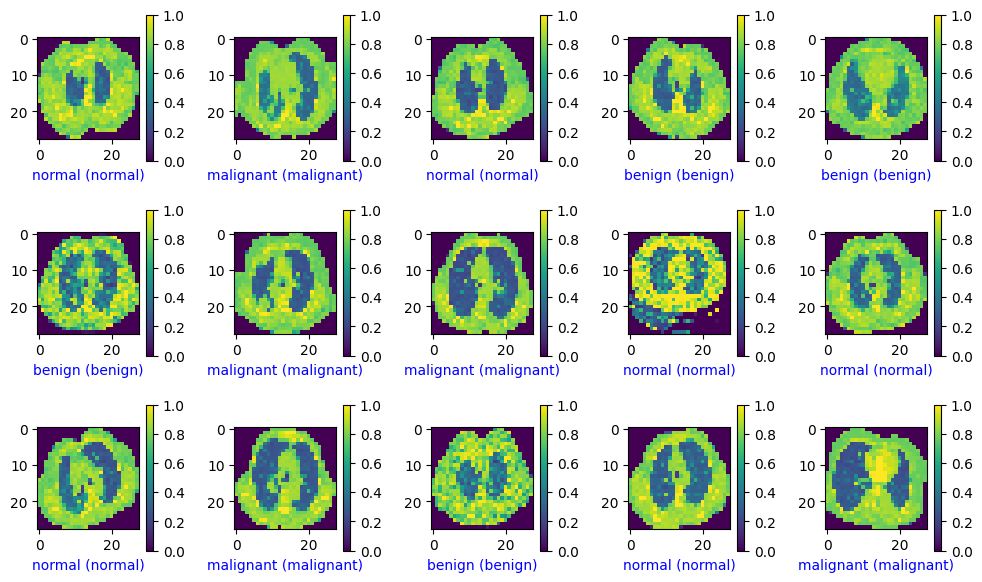

In [97]:
# Define number of rows and columns for the grid
num_rows = 3
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    img = x_test[i]  # No need to reshape if images are already in (28, 28, 3)
    plt.imshow(img)  # Displays the image in color
    plt.colorbar()
    plt.grid(False)

    # Show the predicted and true labels
    predicted_label = np.argmax(classifications[i])
    true_label = y_test[i] if len(y_test.shape) == 1 else np.argmax(y_test[i])

    # Set title with color coding for correct/incorrect predictions
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.tight_layout()
plt.show()

## Visualize Layers

In [99]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_32>]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


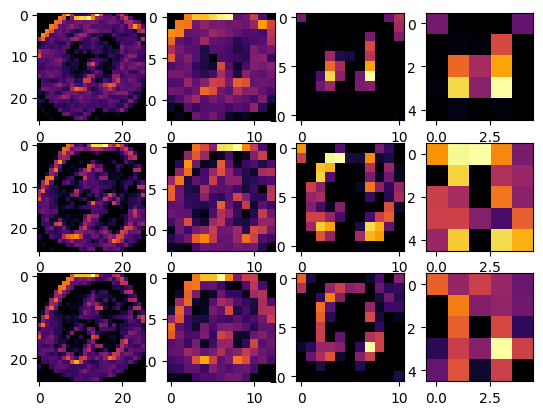

In [100]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
import tensorflow as tf

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)